In [1]:
import torch

\begin{equation}
    u_{i,j} =
    \begin{bmatrix}
      \frac{\partial u_1}{\partial x_1} & 
        \frac{\partial u_1}{\partial x_2} & 
        \frac{\partial u_1}{\partial x_3} \\[1ex] % <-- 1ex more space between rows of matrix
      \frac{\partial u_2}{\partial x_1} & 
        \frac{\partial u_2}{\partial x_2} & 
        \frac{\partial u_2}{\partial x_3} \\[1ex]
      \frac{\partial u_3}{\partial x_1} & 
        \frac{\partial u_3}{\partial x_2} & 
        \frac{\partial u_3}{\partial x_3}
    \end{bmatrix}
\end{equation}

## The `autograd` package

This package provides automatic differentiation for Tensors.

All `torch.Tensor` objects have an attribute called `.requires_grad`. When we set it as `True`, torch starts to track all the operations in order to compute its gradient. When all the computation is done, we can call the `.backward()` method, and the gradients will be computed and accumulated into `.grad` attribute.

If we want a `torch.Tensor` to stop tracking operations, we should call `.detach()`

Each `torch.Tensor` that uses `.requires_grad`, uses its `.grad_fn` to store an auxiliar function that helps `autograd` to compute gradients.

### 1. Simple example

Let $f$ be a differentiable function as, for example, $f = \frac{1}{10} (x - 2)^2$. This way, $\frac{\partial f}{\partial x} = - \frac{1}{5} (x - 2)$.

Now, lets suppose that $x = 1$. The gradient at this point shuold be $\frac{\partial f}{\partial x} = - \frac{1}{5}$.

In [2]:
x = torch.ones(1, requires_grad=True)
print(x)

tensor([1.], requires_grad=True)


In [3]:
y = 1/10 * (x) **2
print(y, y.grad_fn)

tensor([0.1000], grad_fn=<MulBackward0>) <MulBackward0 object at 0x1199d0160>


In [4]:
y.backward()

In [5]:
print("The gradiend should be 1/5, and the result is:", x.grad)

The gradiend should be 1/5, and the result is: tensor([0.2000])


#### 2. Bigger inputs

In [6]:
def f(x):
    return x**3 - 2*x**2 + 2

In [7]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [8]:
y = f(x)
try:
    y.backward()
except RuntimeError as rte:
    print(rte)

grad can be implicitly created only for scalar outputs


As we can see, we can only call backward with scalar tensors. We'll always need a reduction function. The `.backward()` method must be called from the `torch.Tensor` that keeps the reduced value.

In [9]:
z = torch.mean(y)
z.backward()

All the gradients computed regarding the same variable. That means that we are computing the same gradient 5 times.

In [10]:
x.grad

tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])

\begin{equation}
    D =
    \begin{bmatrix}
      \frac{\partial z}{\partial x_1} & 
        \frac{\partial z}{\partial x_2} & 
        \frac{\partial z}{\partial x_3} \\[1ex] % <-- 1ex more space between rows of matrix
    \end{bmatrix}
\end{equation}

where $\forall i \in \{ 1, ..., n \}$ :

\begin{equation}
    \frac{\partial z}{\partial x_i} = \frac{\partial }{\partial x_i} \big( \frac{1}{n} \sum_{j=1}^n f(x_j) \big) =
    \frac{\partial }{\partial x_i} \big( \frac{1}{n} f(x_i) \big) =
    \frac{1}{n} \frac{\partial }{\partial x_i} f(x_i)
\end{equation}

#### 3. Plotting gradients

In [11]:
import matplotlib.pyplot as plt

In [12]:
x = torch.linspace(-1, 2, 100, requires_grad=True)
#x = torch.zeros(10, requires_grad=True)
#x = torch.ones(10, requires_grad=True) * 2
y = f(x)

In [13]:
z = torch.sum(y) # with sum it's ok, but using mean... se divide entre la longitud del array :S
z.backward()

A `torch.Tensor` that `requires_grad` can't be converted to numpy directly. It requires being detached. 

`!` detach creates a detached copy, but it doesn't detach the `torch.Tensor`.

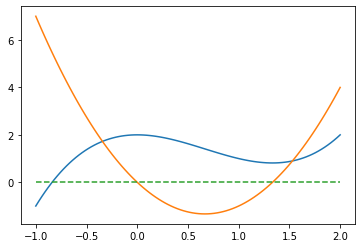

In [14]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.plot(x.detach().numpy(), torch.zeros(x.size()[0]), '--')